In [1]:
import pandas as pd
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib notebook

import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU
from sklearn import preprocessing

Using TensorFlow backend.
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [9]:
df_deep = pd.read_csv('train.csv')

In [10]:
df_deep

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054
5,Minor_Damage_And_Injuries,43.333333,15,0,73.336372,0.432954,78.63,2,29288.448105,1,0.394505,10947
6,Highly_Fatal_And_Damaging,22.009132,15,10,62.853236,0.314671,88.04,4,32342.109345,0,0.058872,4717
7,Minor_Damage_And_Injuries,24.703196,18,4,60.802188,0.548353,83.48,4,22547.195242,2,0.040419,8008
8,Highly_Fatal_And_Damaging,54.840183,5,40,69.234275,0.335587,78.24,2,45751.983413,0,0.619186,8179
9,Significant_Damage_And_Serious_Injuries,52.237443,6,4,57.429353,0.465410,79.56,1,37933.399001,1,1.389295,6324


In [11]:
y = df_deep.pop('Severity')

In [5]:
y

0                     Minor_Damage_And_Injuries
1                     Minor_Damage_And_Injuries
2             Significant_Damage_And_Fatalities
3       Significant_Damage_And_Serious_Injuries
4             Significant_Damage_And_Fatalities
5                     Minor_Damage_And_Injuries
6                     Highly_Fatal_And_Damaging
7                     Minor_Damage_And_Injuries
8                     Highly_Fatal_And_Damaging
9       Significant_Damage_And_Serious_Injuries
10                    Highly_Fatal_And_Damaging
11      Significant_Damage_And_Serious_Injuries
12      Significant_Damage_And_Serious_Injuries
13            Significant_Damage_And_Fatalities
14                    Highly_Fatal_And_Damaging
15                    Highly_Fatal_And_Damaging
16                    Highly_Fatal_And_Damaging
17            Significant_Damage_And_Fatalities
18            Significant_Damage_And_Fatalities
19            Significant_Damage_And_Fatalities
20                    Minor_Damage_And_I

In [6]:
y = pd.get_dummies(y)
y

,Highly_Fatal_And_Damaging,Minor_Damage_And_Injuries,Significant_Damage_And_Fatalities,Significant_Damage_And_Serious_Injuries
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
5,0,1,0,0
6,1,0,0,0
7,0,1,0,0
8,1,0,0,0
9,0,0,0,1


In [7]:
y.values

array([[0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0]], dtype=uint8)

In [12]:
df_deep = df_deep.drop('Accident_ID', axis=1)

In [13]:
acc_code = df_deep.pop('Accident_Type_Code')

In [14]:
acc_code = pd.get_dummies(acc_code, prefix='Accident_Type')
acc_code

,Accident_Type_1,Accident_Type_2,Accident_Type_3,Accident_Type_4,Accident_Type_5,Accident_Type_6,Accident_Type_7
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
5,0,1,0,0,0,0,0
6,0,0,0,1,0,0,0
7,0,0,0,1,0,0,0
8,0,1,0,0,0,0,0
9,1,0,0,0,0,0,0


In [15]:
normalized_df_deep = (df_deep-df_deep.mean())/df_deep.std()

In [16]:
normalized_df_deep

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric
0,0.455280,0.301966,2.213962,0.516707,-0.901704,-0.699099,-0.070645,0.949826,0.442679
1,1.275824,-0.828040,2.931118,0.601092,0.349905,1.656196,-0.633704,-0.011731,0.253760
2,1.312608,0.019464,1.353374,0.102457,-0.485492,-0.401969,0.770489,0.949826,-0.661906
3,0.384543,-0.545539,0.349355,0.804382,-0.366574,0.659725,1.141826,-0.973288,-0.115202
4,-0.953794,0.019464,2.644255,-1.447149,1.316111,-1.017970,0.371865,-0.011731,-0.206627
5,0.090279,0.584468,-0.941526,0.689312,0.424228,-0.485311,-0.287676,-0.973288,0.364366
6,-1.231081,0.584468,0.492787,-0.192889,-0.550897,2.924432,0.036080,-1.934844,-0.516265
7,-1.064143,1.431972,-0.367801,-0.365494,1.375570,1.272102,-1.002397,-0.011731,-0.564680
8,0.803304,-2.240548,4.795724,0.344103,-0.378466,-0.626628,1.457823,-1.934844,0.953881
9,0.642024,-1.958047,-0.367801,-0.649332,0.691793,-0.148322,0.628880,-0.973288,2.974488


In [17]:
X_deep = pd.concat([normalized_df_deep, acc_code], axis=1)
X_deep

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_Type_1,Accident_Type_2,Accident_Type_3,Accident_Type_4,Accident_Type_5,Accident_Type_6,Accident_Type_7
0,0.455280,0.301966,2.213962,0.516707,-0.901704,-0.699099,-0.070645,0.949826,0.442679,0,1,0,0,0,0,0
1,1.275824,-0.828040,2.931118,0.601092,0.349905,1.656196,-0.633704,-0.011731,0.253760,0,1,0,0,0,0,0
2,1.312608,0.019464,1.353374,0.102457,-0.485492,-0.401969,0.770489,0.949826,-0.661906,0,0,0,0,0,0,1
3,0.384543,-0.545539,0.349355,0.804382,-0.366574,0.659725,1.141826,-0.973288,-0.115202,0,0,1,0,0,0,0
4,-0.953794,0.019464,2.644255,-1.447149,1.316111,-1.017970,0.371865,-0.011731,-0.206627,0,0,1,0,0,0,0
5,0.090279,0.584468,-0.941526,0.689312,0.424228,-0.485311,-0.287676,-0.973288,0.364366,0,1,0,0,0,0,0
6,-1.231081,0.584468,0.492787,-0.192889,-0.550897,2.924432,0.036080,-1.934844,-0.516265,0,0,0,1,0,0,0
7,-1.064143,1.431972,-0.367801,-0.365494,1.375570,1.272102,-1.002397,-0.011731,-0.564680,0,0,0,1,0,0,0
8,0.803304,-2.240548,4.795724,0.344103,-0.378466,-0.626628,1.457823,-1.934844,0.953881,0,1,0,0,0,0,0
9,0.642024,-1.958047,-0.367801,-0.649332,0.691793,-0.148322,0.628880,-0.973288,2.974488,1,0,0,0,0,0,0


<IPython.core.display.Javascript object>


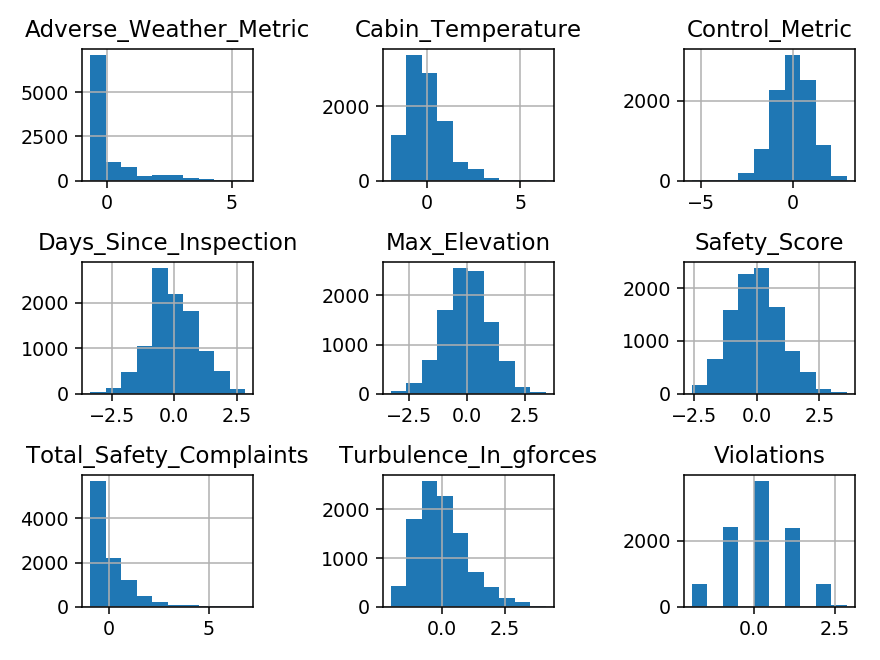

In [636]:
normalized_df_deep.hist()
plt.tight_layout()

In [637]:
def get_model():
    
    model = Sequential()

    model.add(Dense(1024, input_shape=((16, ))))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.2))

    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.2))

    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.2))

    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.2))

    model.add(Dense(4, activation = 'softmax'))
    
    return model

In [638]:
model = get_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1024)              17408     
_________________________________________________________________
batch_normalization_6 (Batch (None, 1024)              4096      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 512)               0         
__________

In [639]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [640]:
from time import time
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard

tensorboard = TensorBoard(log_dir="./logs/{}".format(time()))

filepath = ".Models" + "dense-2-" + "saved-model-{epoch:02d}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=False, mode='max')
callbacks_list = [checkpoint, tensorboard]

In [18]:
from sklearn.model_selection import train_test_split

XTrain, XTest, yTrain, yTest = train_test_split(X_deep, y, test_size=0.15)

In [641]:
NUM_EPOCHS = 3
BATCH_SIZE = 64
train_rows = len(XTrain) 


history = model.fit(XTrain, yTrain, epochs=NUM_EPOCHS,
                   steps_per_epoch= train_rows // BATCH_SIZE, 
                   shuffle=True, callbacks=callbacks_list,
                   )

Epoch 1/3
132/132 [==============================] - 197s 1s/step - loss: 0.3391 - acc: 0.8810

Epoch 00001: saving model to .Modelsdense-2-saved-model-01.hdf5
Epoch 2/3
132/132 [==============================] - 207s 2s/step - loss: 0.1463 - acc: 0.9497

Epoch 00002: saving model to .Modelsdense-2-saved-model-02.hdf5
Epoch 3/3
132/132 [==============================] - 199s 2s/step - loss: 0.1067 - acc: 0.9615

Epoch 00003: saving model to .Modelsdense-2-saved-model-03.hdf5


<IPython.core.display.Javascript object>


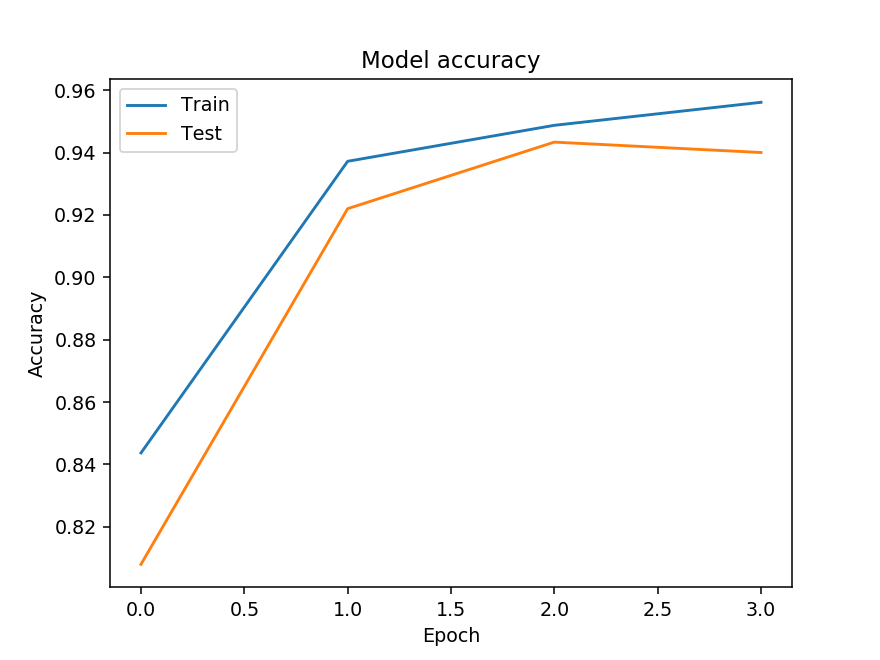

In [96]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


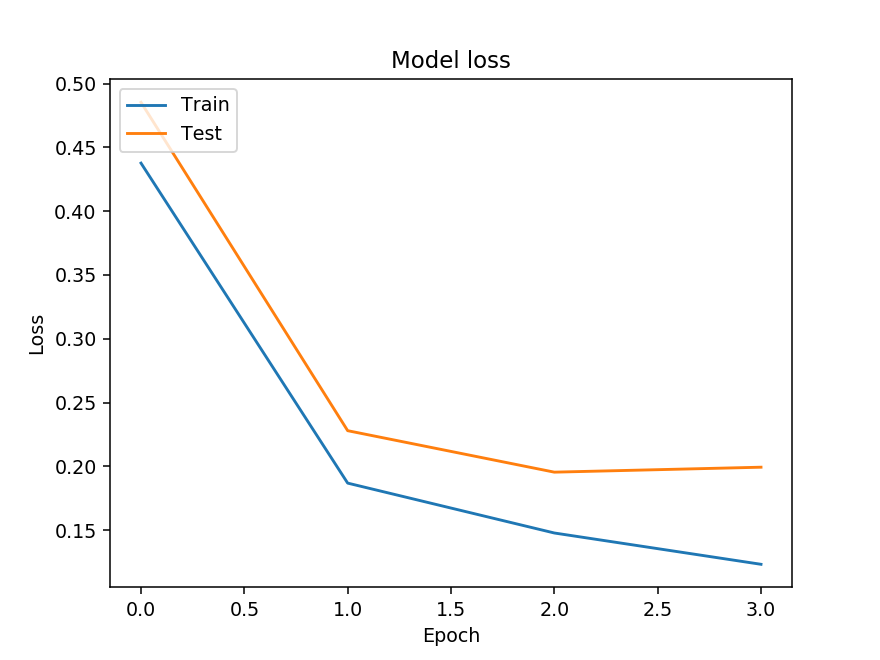

In [97]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [267]:
from keras.models import load_model

model = load_model('.Modelsdense-saved-model-03.hdf5')





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [116]:
to_predict = XTest.iloc[0].values

In [131]:
pred = model.predict(to_predict.reshape(-1, 16))
predicted_class_indices = np.argmax(pred, axis=1)
pred

array([[7.0402445e-04, 9.9329537e-01, 2.6525641e-04, 5.7352921e-03]],
      dtype=float32)

In [122]:
predicted_class_indices

array([1], dtype=int64)

In [268]:
test_df_deep = pd.read_csv('test.csv')

<IPython.core.display.Javascript object>


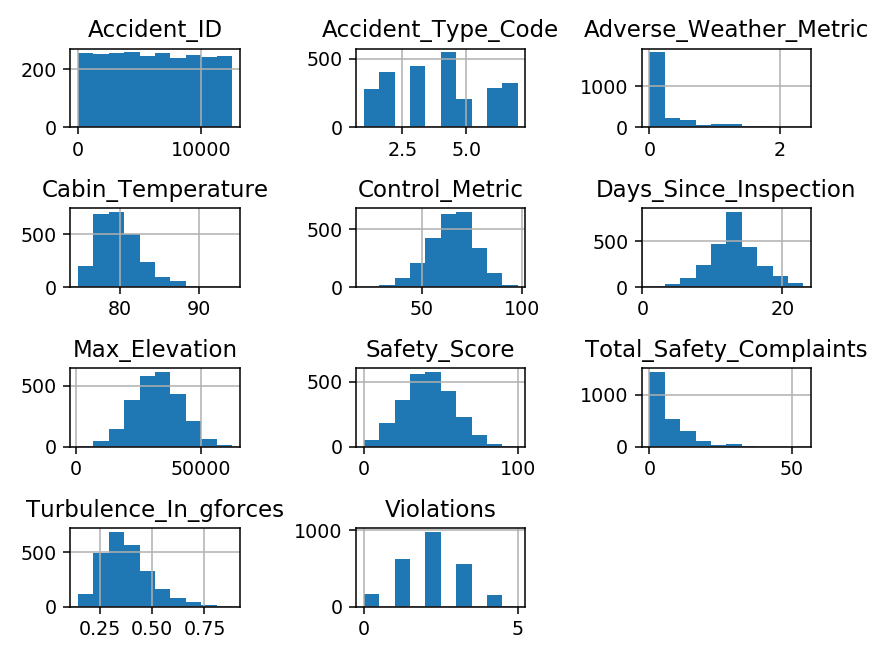

In [643]:
test_df_deep.hist()
plt.tight_layout()

In [269]:
ids = test_df_deep.pop('Accident_ID')

In [270]:
test_df_deep

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696
5,44.794521,8,14,52.597995,0.366961,77.08,2,15496.086157,1,0.221040
6,62.374429,13,13,66.499544,0.375616,88.48,7,23226.236895,3,0.002196
7,14.520548,17,5,66.180492,0.413841,80.09,4,39076.313532,1,0.071707
8,0.000000,20,0,67.730173,0.203960,78.37,6,38472.698964,2,0.009371
9,45.981735,11,4,66.545123,0.252283,82.69,6,25419.801519,2,0.006051


In [271]:
Accident_Type_Code = test_df_deep.pop('Accident_Type_Code')

In [272]:
Accident_Type_Code = pd.get_dummies(Accident_Type_Code, prefix='Accident_Type')
Accident_Type_Code

,Accident_Type_1,Accident_Type_2,Accident_Type_3,Accident_Type_4,Accident_Type_5,Accident_Type_6,Accident_Type_7
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
5,0,1,0,0,0,0,0
6,0,0,0,0,0,0,1
7,0,0,0,1,0,0,0
8,0,0,0,0,0,1,0
9,0,0,0,0,0,1,0


In [284]:
normalized_test_deep = (test_df_deep-df_deep.mean())/df_deep.std()

In [285]:
normalized_test_deep = pd.concat([normalized_test_deep, Accident_Type_Code], axis=1)
normalized_test_deep

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_Type_1,Accident_Type_2,Accident_Type_3,Accident_Type_4,Accident_Type_5,Accident_Type_6,Accident_Type_7
0,-1.386702,0.866969,-0.080938,0.589585,0.061529,-0.597640,0.630611,-0.011731,-0.487874,0,0,0,1,0,0,0
1,1.009855,0.584468,-0.511232,-0.047134,-1.077108,-0.496181,-0.191582,-0.011731,-0.663445,0,0,0,0,0,0,1
2,-0.532203,0.584468,-0.511232,-0.035627,-0.369547,2.533090,-1.529780,-0.973288,-0.659407,0,0,0,0,0,1,0
3,-2.391161,2.279477,-0.224369,0.102457,0.332067,0.322737,0.870164,-0.011731,-0.145999,0,0,1,0,0,0,0
4,-1.921470,1.431972,-0.654663,-0.760566,-0.562789,-0.271522,0.370412,-0.011731,0.598384,0,1,0,0,0,0,0
5,0.180822,-1.393044,1.066512,-1.055912,-0.119820,-1.046958,-1.749971,-0.973288,-0.090769,0,1,0,0,0,0,0
6,1.270166,0.019464,0.923080,0.113963,-0.048470,3.083867,-0.930404,0.949826,-0.664971,0,0,0,0,0,0,1
7,-1.695113,1.149471,-0.224369,0.087114,0.266662,0.043725,0.750054,-0.973288,-0.482588,0,0,0,1,0,0,0
8,-2.594883,1.996975,-0.941526,0.217526,-1.463590,-0.579523,0.686058,-0.011731,-0.646144,0,0,0,0,0,1,0
9,0.254388,-0.545539,-0.367801,0.117799,-1.065216,0.985843,-0.697838,-0.011731,-0.654855,0,0,0,0,0,1,0


In [286]:
preds_deep = model.predict(normalized_test_deep)

In [660]:
preds_deep

array([[9.9893147e-01, 6.7108071e-05, 1.9165027e-04, 8.0977165e-04],
       [1.0342313e-05, 1.2577185e-04, 9.9921548e-01, 6.4830371e-04],
       [7.1628776e-05, 1.6822998e-04, 6.8994941e-06, 9.9975330e-01],
       ...,
       [3.3168537e-05, 6.3389924e-04, 2.1474261e-05, 9.9931145e-01],
       [5.1002738e-05, 3.6487156e-05, 4.5425090e-06, 9.9990797e-01],
       [9.7905868e-01, 3.4109398e-04, 1.6809840e-02, 3.7903457e-03]],
      dtype=float32)

In [652]:
predicted_class_indices = np.argmax(preds_deep, axis=1)
predicted_class_indices

array([0, 2, 3, ..., 3, 3, 0], dtype=int64)

In [653]:
decoding = {0 : "Highly_Fatal_And_Damaging", 1 : "Minor_Damage_And_Injuries", 2 : "Significant_Damage_And_Fatalities", 3:"Significant_Damage_And_Serious_Injuries" }

In [654]:
predictions = [decoding[k] for k in predicted_class_indices]

In [655]:
predictions

['Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Fatalities',
 'Significant_Damage_And_Serious_Injuries',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Fatalities',
 'Significant_Damage_And_Fatalities',
 'Significant_Damage_And_Fatalities',
 'Highly_Fatal_And_Damaging',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Serious_Injuries',
 'Significant_Damage_And_Serious_Injuries',
 'Significant_Damage_And_Serious_Injuries',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Fatalities',
 'Significant_Damage_And_Fatalities',
 'Significant_Damage_And_Serious_Injuries',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Serious_Injuries',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Fatalities',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Serious_Injuries',
 'Significant_Damage_And_Fatalities',
 'Highly_Fatal_And_Damaging',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Fatalities',
 'Highly_Fatal_And_Damaging',
 'Highly_Fatal_And_D

In [656]:
results=pd.DataFrame({"Accident_ID":ids,
                      "Severity":predictions})

In [657]:
results.to_csv('results_deep3.csv', index=False)

In [19]:
from xgboost import XGBClassifier
import xgboost as xgb

In [8]:
X = pd.concat([df_deep, acc_code], axis=1)
X

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_Type_1,Accident_Type_2,Accident_Type_3,Accident_Type_4,Accident_Type_5,Accident_Type_6,Accident_Type_7
0,49.223744,14,22,71.285324,0.272118,78.04,31335.476824,3,0.424352,0,1,0,0,0,0,0
1,62.465753,10,27,72.288058,0.423939,84.54,26024.711057,2,0.352350,0,1,0,0,0,0,0
2,63.059361,13,16,66.362808,0.322604,78.86,39269.053927,3,0.003364,0,0,0,0,0,0,1
3,48.082192,11,9,74.703737,0.337029,81.79,42771.499200,1,0.211728,0,0,1,0,0,0,0
4,26.484018,13,25,47.948952,0.541140,77.16,35509.228515,2,0.176883,0,0,1,0,0,0,0
5,43.333333,15,0,73.336372,0.432954,78.63,29288.448105,1,0.394505,0,1,0,0,0,0,0
6,22.009132,15,10,62.853236,0.314671,88.04,32342.109345,0,0.058872,0,0,0,1,0,0,0
7,24.703196,18,4,60.802188,0.548353,83.48,22547.195242,2,0.040419,0,0,0,1,0,0,0
8,54.840183,5,40,69.234275,0.335587,78.24,45751.983413,0,0.619186,0,1,0,0,0,0,0
9,52.237443,6,4,57.429353,0.465410,79.56,37933.399001,1,1.389295,1,0,0,0,0,0,0


In [9]:
y

0                     Minor_Damage_And_Injuries
1                     Minor_Damage_And_Injuries
2             Significant_Damage_And_Fatalities
3       Significant_Damage_And_Serious_Injuries
4             Significant_Damage_And_Fatalities
5                     Minor_Damage_And_Injuries
6                     Highly_Fatal_And_Damaging
7                     Minor_Damage_And_Injuries
8                     Highly_Fatal_And_Damaging
9       Significant_Damage_And_Serious_Injuries
10                    Highly_Fatal_And_Damaging
11      Significant_Damage_And_Serious_Injuries
12      Significant_Damage_And_Serious_Injuries
13            Significant_Damage_And_Fatalities
14                    Highly_Fatal_And_Damaging
15                    Highly_Fatal_And_Damaging
16                    Highly_Fatal_And_Damaging
17            Significant_Damage_And_Fatalities
18            Significant_Damage_And_Fatalities
19            Significant_Damage_And_Fatalities
20                    Minor_Damage_And_I

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.15)

In [22]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [23]:
# BEST

param = {
    'max_depth': 5,  # the maximum depth of each tree
    'eta': 0.4,  # the training step for each iteration
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 4}  # the number of classes that exist in this datset
num_round = 650  # the number of training iterations

In [41]:
param = {
    'max_depth': 5,  # the maximum depth of each tree
    'eta': 0.4,  # the training step for each iteration
    'objective': 'binary:logistic',  # error evaluation for multiclass training
    'num_class': 4}  # the number of classes that exist in this datset
num_round = 650  # the number of training iterations

In [107]:
param = {
      # the maximum depth of each tree
    'eta': 0.08,  # the training step for each iteration
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 4,
    'learning_rate' :0.3,
     'n_estimators':5000,
     'max_depth':4,
     'min_child_weight':6,
     'gamma':0,
     'subsample':0.8,
     'colsample_bytree':0.8,
     'reg_alpha':0.005,
     'scale_pos_weight':1,}  # the number of classes that exist in this datset
num_round = 3500  # the number of training iterations

In [24]:
bst = xgb.train(param, dtrain, num_round)

In [99]:
preds = bst.predict(dtest)

In [26]:
preds

array([[2.40925510e-04, 1.86831952e-04, 1.50935857e-05, 9.99557078e-01],
       [1.35099335e-05, 1.66000085e-04, 7.23741425e-04, 9.99096751e-01],
       [1.94237307e-02, 9.74538684e-01, 5.49771683e-03, 5.39877976e-04],
       ...,
       [2.56123457e-07, 1.37177249e-05, 1.03905933e-08, 9.99986053e-01],
       [4.60034107e-06, 1.17320393e-04, 1.75654378e-07, 9.99877930e-01],
       [3.26087379e-09, 6.03627777e-05, 9.99939561e-01, 5.00750339e-08]],
      dtype=float32)

In [27]:
predicted_class_indices = np.argmax(preds, axis=1)
predicted_class_indices

array([3, 3, 1, ..., 3, 3, 2], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predicted_class_indices)
score

0.96

In [100]:
test_df = pd.read_csv('test.csv')

ids, test_df = transform(test_df)
test_df

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_Type_1,Accident_Type_2,Accident_Type_3,Accident_Type_4,Accident_Type_5,Accident_Type_6,Accident_Type_7
0,19.497717,16,6,72.151322,0.388959,78.32,37949.724386,2,0.069692,0,0,0,1,0,0,0
1,58.173516,15,3,64.585232,0.250841,78.60,30194.805567,2,0.002777,0,0,0,0,0,0,1
2,33.287671,15,3,64.721969,0.336669,86.96,17572.925484,1,0.004316,0,0,0,0,0,1,0
3,3.287671,21,5,66.362808,0.421775,80.86,40209.186341,2,0.199990,0,0,1,0,0,0,0
4,10.867580,18,2,56.107566,0.313228,79.22,35495.525408,2,0.483696,0,1,0,0,0,0,0
5,44.794521,8,14,52.597995,0.366961,77.08,15496.086157,1,0.221040,0,1,0,0,0,0,0
6,62.374429,13,13,66.499544,0.375616,88.48,23226.236895,3,0.002196,0,0,0,0,0,0,1
7,14.520548,17,5,66.180492,0.413841,80.09,39076.313532,1,0.071707,0,0,0,1,0,0,0
8,0.000000,20,0,67.730173,0.203960,78.37,38472.698964,2,0.009371,0,0,0,0,0,1,0
9,45.981735,11,4,66.545123,0.252283,82.69,25419.801519,2,0.006051,0,0,0,0,0,1,0


In [101]:
dtest1 = xgb.DMatrix(test_df)

In [102]:
test_df = (test_df - test_df.mean())/test_df.std()

In [103]:
preds = bst.predict(dtest1)
preds

array([[7.6506570e-12, 4.8061794e-11, 1.0000000e+00, 1.0723694e-10],
       [6.1849782e-13, 2.3689163e-11, 1.0000000e+00, 3.6916248e-11],
       [4.9388233e-13, 1.5773825e-11, 1.0000000e+00, 2.6473081e-11],
       ...,
       [2.5508963e-12, 2.1156965e-11, 1.0000000e+00, 5.4155371e-11],
       [1.8257576e-12, 1.8271417e-11, 1.0000000e+00, 3.8978237e-11],
       [4.2196157e-13, 2.0694476e-11, 1.0000000e+00, 1.2009205e-11]],
      dtype=float32)

In [38]:
predicted_class_indices = np.argmax(preds, axis=1)
predicted_class_indices

array([0, 2, 3, ..., 3, 3, 0], dtype=int64)

In [39]:
decoding = {0 : "Highly_Fatal_And_Damaging", 1 : "Minor_Damage_And_Injuries", 2 : "Significant_Damage_And_Fatalities", 3:"Significant_Damage_And_Serious_Injuries" }
predictions = [decoding[k] for k in predicted_class_indices]
predictions

['Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Fatalities',
 'Significant_Damage_And_Serious_Injuries',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Fatalities',
 'Significant_Damage_And_Fatalities',
 'Significant_Damage_And_Fatalities',
 'Highly_Fatal_And_Damaging',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Serious_Injuries',
 'Minor_Damage_And_Injuries',
 'Significant_Damage_And_Serious_Injuries',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Serious_Injuries',
 'Significant_Damage_And_Fatalities',
 'Significant_Damage_And_Serious_Injuries',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Serious_Injuries',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Fatalities',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Serious_Injuries',
 'Significant_Damage_And_Fatalities',
 'Highly_Fatal_And_Damaging',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Fatalities',
 'Significant_Damage_And_Fatalities',
 'Highly_Fatal_And_D

In [40]:
results=pd.DataFrame({"Accident_ID":ids,
                      "Severity":predictions})
results.to_csv('results_xg_normalized.csv', index=False)

In [116]:
ensembled = (0.9*preds_r + 0.1*preds)/2

In [117]:
predicted_class_indices = np.argmax(ensembled, axis=1)
predicted_class_indices

array([0, 2, 3, ..., 3, 3, 0], dtype=int64)

In [118]:
decoding = {0 : "Highly_Fatal_And_Damaging", 1 : "Minor_Damage_And_Injuries", 2 : "Significant_Damage_And_Fatalities", 3:"Significant_Damage_And_Serious_Injuries" }
predictions = [decoding[k] for k in predicted_class_indices]
predictions

['Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Fatalities',
 'Significant_Damage_And_Serious_Injuries',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Fatalities',
 'Significant_Damage_And_Fatalities',
 'Significant_Damage_And_Fatalities',
 'Highly_Fatal_And_Damaging',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Serious_Injuries',
 'Minor_Damage_And_Injuries',
 'Significant_Damage_And_Serious_Injuries',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Serious_Injuries',
 'Significant_Damage_And_Fatalities',
 'Significant_Damage_And_Serious_Injuries',
 'Highly_Fatal_And_Damaging',
 'Highly_Fatal_And_Damaging',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Fatalities',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Serious_Injuries',
 'Significant_Damage_And_Fatalities',
 'Minor_Damage_And_Injuries',
 'Highly_Fatal_And_Damaging',
 'Significant_Damage_And_Fatalities',
 'Significant_Damage_And_Fatalities',
 'Highly_Fatal_And_Damaging',
 'Si

In [119]:
results=pd.DataFrame({"Accident_ID":ids,
                      "Severity":predictions})
results.to_csv('results_ensembled-xgr.csv', index=False)

<IPython.core.display.Javascript object>


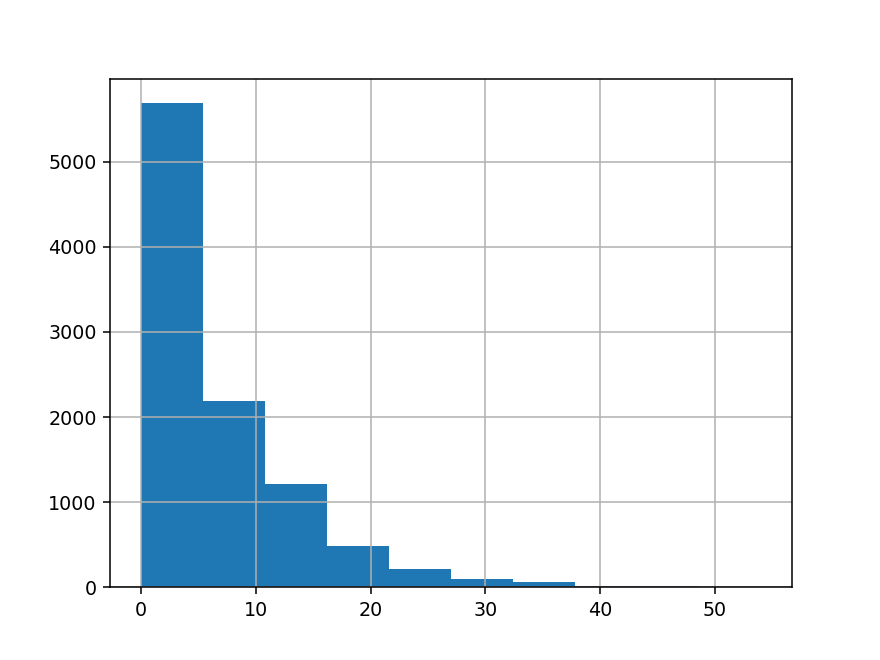

In [120]:
df_deep['Total_Safety_Complaints'].hist()

<IPython.core.display.Javascript object>


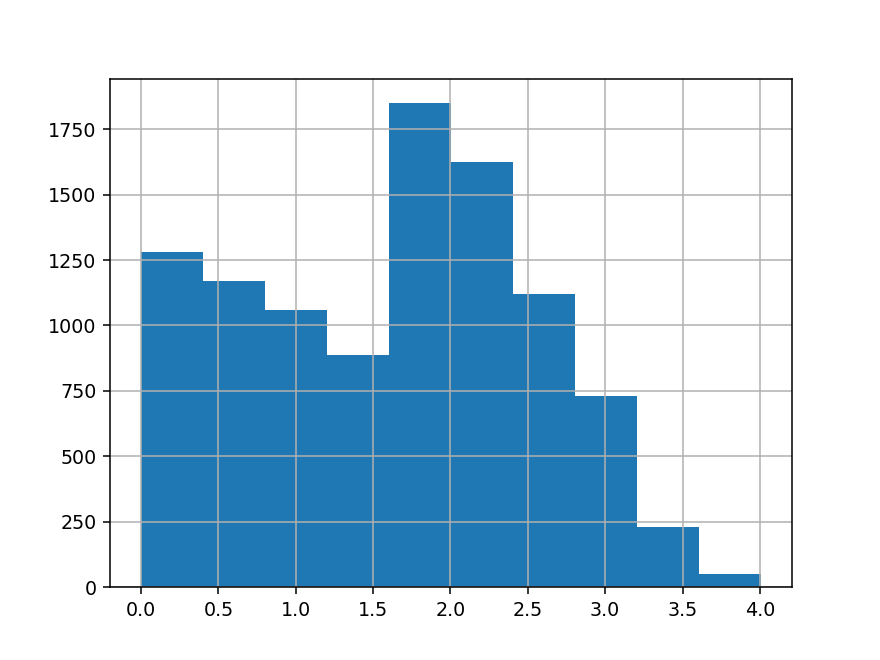

In [21]:
df_deep['Total_Safety_Complaints'].apply(lambda x: np.log(x+1)).hist()

In [57]:
complaints_cat = []
for i in X['Total_Safety_Complaints']:
    if i <= 2:
        complaints_cat.append(0)
    elif i <= 10:
        complaints_cat.append(1)
    elif i <= 20:
        complaints_cat.append(2)
    else:
        complaints_cat.append(3)

<IPython.core.display.Javascript object>


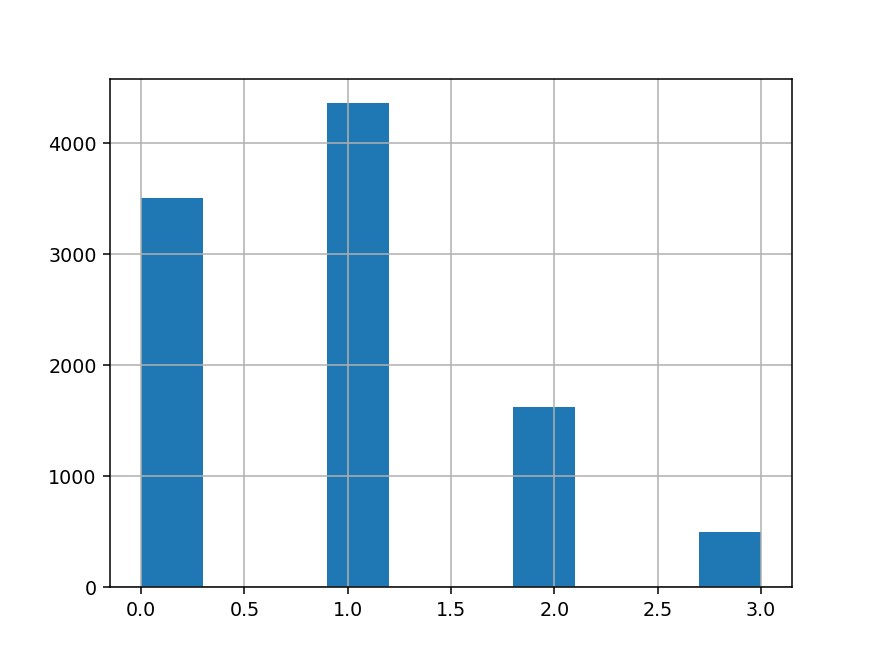

In [58]:
pd.Series(complaints_cat).hist()

In [73]:
complaints_cat = pd.get_dummies(complaints_cat)
complaints_cat

,0,1,2,3
0,0,0,0,1
1,0,0,0,1
2,0,0,1,0
3,0,1,0,0
4,0,0,0,1
5,1,0,0,0
6,0,1,0,0
7,0,1,0,0
8,0,0,0,1
9,0,1,0,0


In [79]:
df_deep = pd.concat([df_deep, complaints_cat], axis=1)
df_deep.drop(['Total_Safety_Complaints'], axis=1, inplace=True)

<IPython.core.display.Javascript object>


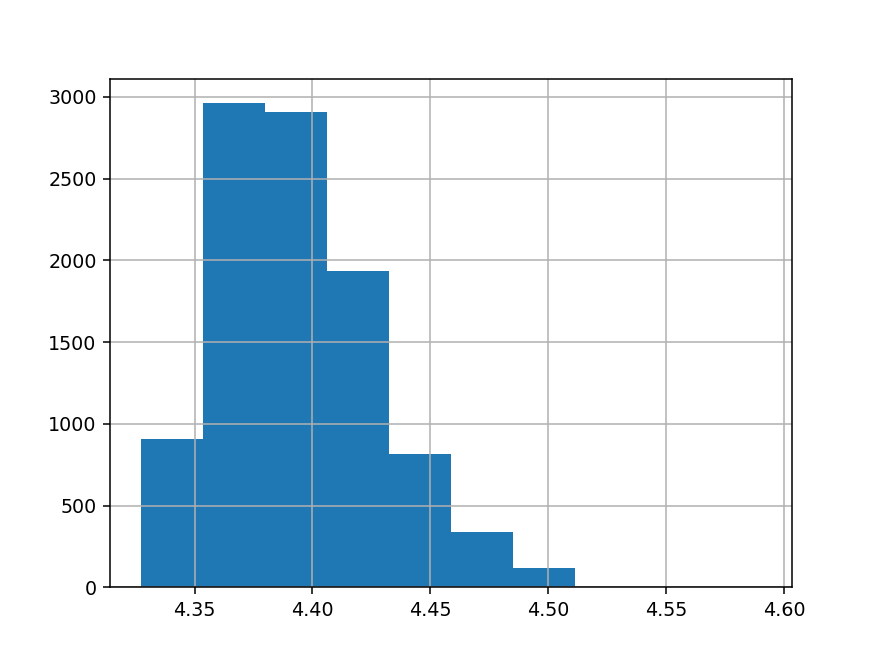

In [74]:
df_deep['Cabin_Temperature'].apply(lambda x: np.log(x+1)).hist()

In [ ]:
df_deep['Cabin_Temperature'] = df_deep['Cabin_Temperature'].apply(lambda x: np.log(x+1))

<IPython.core.display.Javascript object>


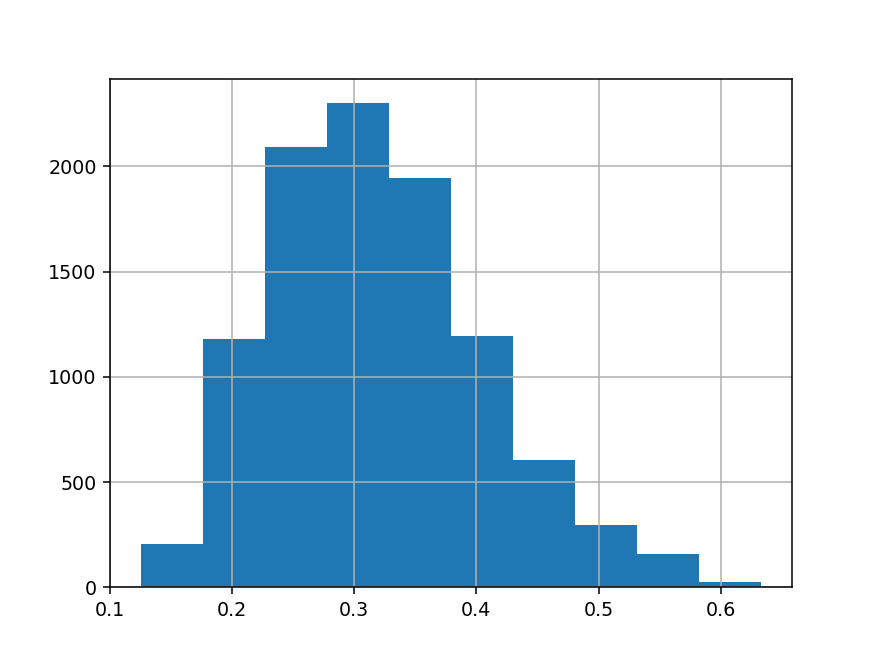

In [68]:
df_deep['Turbulence_In_gforces'].apply(lambda x: np.log(x+1)).hist()

In [ ]:
df_deep['Turbulence_In_gforces'] = df_deep['Turbulence_In_gforces'].apply(lambda x: np.log(x+1))

In [137]:
from scipy import stats
data = df_deep['Cabin_Temperature']
res = stats.boxcox(data)

TypeError: '<=' not supported between instances of 'AxesSubplot' and 'int'

<IPython.core.display.Javascript object>


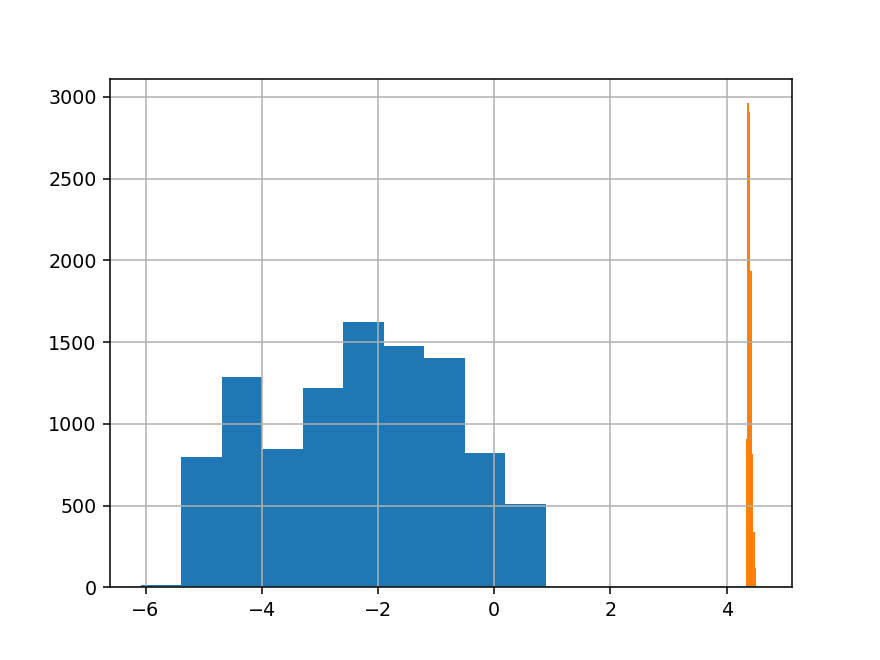

In [138]:
pd.Series(res[0]).hist()

In [133]:
from scipy import stats
data = df_deep['Adverse_Weather_Metric']
res = stats.boxcox(data)

<IPython.core.display.Javascript object>


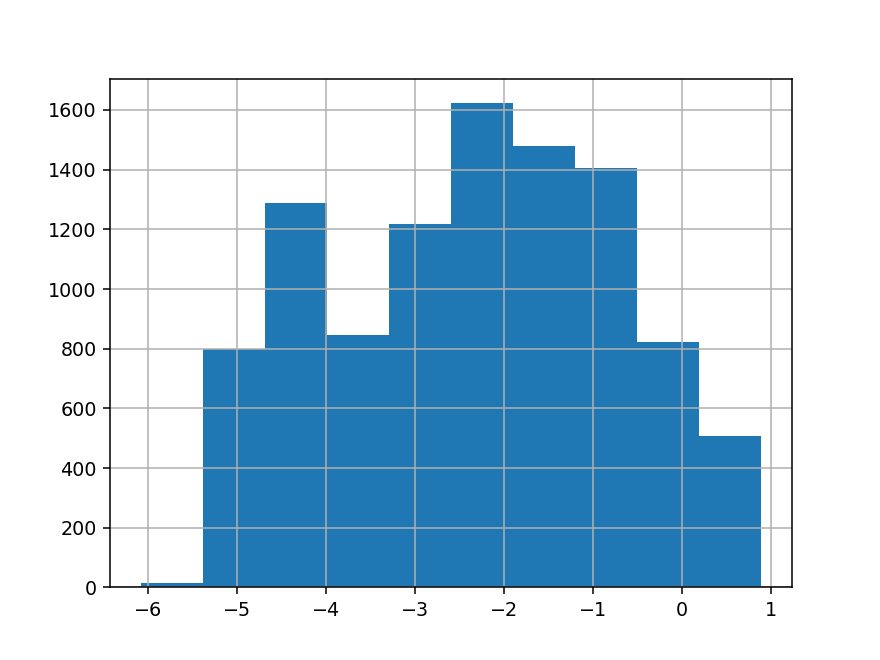

In [134]:
pd.Series(res[0]).hist()

In [135]:
df_deep['Adverse_Weather_Metric'] = pd.Series(res[0])

In [136]:
df_deep['Adverse_Weather_Metric']

0      -0.830712
1      -1.004094
2      -4.651911
3      -1.467046
4      -1.626387
5      -0.899002
6      -2.556666
7      -2.857769
8      -0.470993
9       0.332807
10     -0.829475
11     -2.022950
12     -1.422658
13     -4.827883
14     -2.154160
15     -1.936680
16     -3.822182
17     -2.457124
18     -0.749606
19     -1.715550
20     -0.604438
21     -0.659761
22     -2.264366
23      0.519426
24     -3.030096
25     -3.863872
26     -4.722105
27     -2.710801
28     -4.745464
29     -1.540834
          ...   
9970   -0.616601
9971   -1.537132
9972   -4.191663
9973   -2.822105
9974   -0.948102
9975   -2.475822
9976   -4.005561
9977   -0.853890
9978   -0.027956
9979   -2.798063
9980   -1.654813
9981   -3.391474
9982   -2.003768
9983   -4.506236
9984   -2.638943
9985   -2.535784
9986   -0.115721
9987   -1.891017
9988   -1.752797
9989   -2.127224
9990   -3.201898
9991   -2.439176
9992    0.146160
9993   -2.398845
9994   -2.628841
9995   -3.196202
9996   -2.359455
9997   -1.6707

In [32]:
from scipy import stats

def transform(df):
    
    Accident_Type_Code = df.pop('Accident_Type_Code')
    Accident_Type_Code = pd.get_dummies(Accident_Type_Code, prefix='Accident_Type')
    ids = df.pop('Accident_ID')
    
    df = pd.concat([df, Accident_Type_Code], axis=1)
    
    complaints_cat = []
    for i in df['Total_Safety_Complaints']:
        if i <= 2:
            complaints_cat.append(0)
        elif i <= 10:
            complaints_cat.append(1)
        elif i <= 20:
            complaints_cat.append(2)
        else:
            complaints_cat.append(3)
        
    complaints_cat = pd.get_dummies(complaints_cat, prefix='complaint')

    df = pd.concat([df, complaints_cat], axis=1)
    df.drop(['Total_Safety_Complaints'], axis=1, inplace=True)
    
    df['Turbulence_In_gforces'] = pd.Series(stats.boxcox(df['Turbulence_In_gforces'])[0])
    
    return ids, df

In [253]:
train_df = pd.read_csv('train.csv')

In [254]:
ids, X = transform(train_df)

In [255]:
y = X.pop('Severity')

In [52]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [93]:
clf = RandomForestClassifier(n_estimators=1400,min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=40, bootstrap=False)

In [87]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [88]:
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [89]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.0min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [92]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [94]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(clf)

In [95]:
ovr_clf.fit(X_train.values, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=40, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          n_jobs=1)

In [107]:
preds_r = ovr_clf.predict_proba(test_df)
preds_r

array([[0.95642857, 0.00928571, 0.00214286, 0.03214286],
       [0.01386139, 0.10693069, 0.81386139, 0.06534653],
       [0.05640244, 0.0464939 , 0.01905488, 0.87804878],
       ...,
       [0.05132193, 0.01710731, 0.00233281, 0.92923795],
       [0.0362069 , 0.08793103, 0.00862069, 0.86724138],
       [0.76463415, 0.08170732, 0.01097561, 0.14268293]])

In [97]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, preds)
score

0.916